In [1]:
import os
import json
import pandas as pd
from src.vycisti import vycisti
pd.set_option('display.max_columns', None)
df = pd.read_json(os.path.join("data", "filmy.json"))
with open(os.path.join("data_fixes", "opravy.json"), encoding="utf-8") as opravy:
    opravy = json.loads(opravy.read())
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())
df = vycisti(df, opravy)

2023/05/30 11:22:48 z 4555 řádků odstraněno 125. Aktuální dataframe má 4430 řádků.


In [2]:
df = df.explode("Lokace")

## Explorace

<AxesSubplot:xlabel='Copyright'>

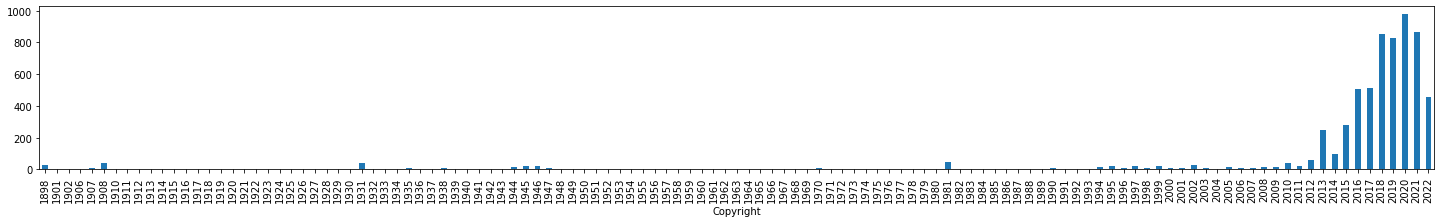

In [3]:
df.groupby("Copyright")["Lokace"].nunique().plot.bar(figsize=(25,3))

<AxesSubplot:xlabel='Copyright'>

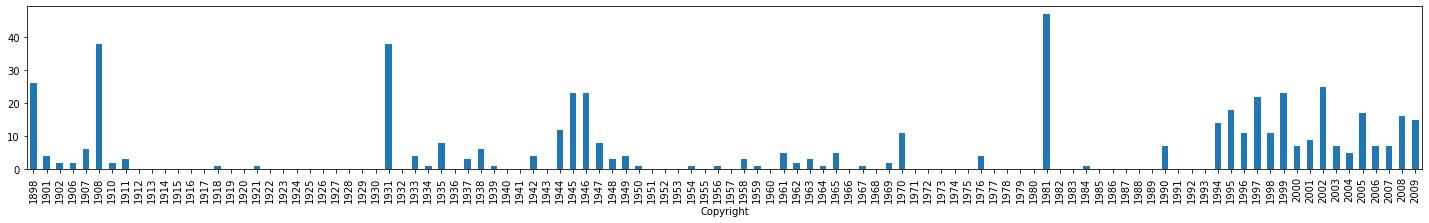

In [4]:
df[df["Copyright"] < 2010].groupby("Copyright")["Lokace"].nunique().plot.bar(figsize=(25,3))

## Čištění

In [5]:
df.groupby("Lokace")["Film"].nunique().nlargest(300).index.to_list()

['Česká republika, Praha (Česká republika)',
 'Nové Město (Praha)',
 'Staré Město (Praha)',
 'Malá Strana (Praha)',
 'Vltava (Praha)',
 'Hradčany (Praha)',
 'Vinohrady (Praha)',
 'Žižkov (Praha)',
 'Holešovice (Praha)',
 'Praha (Česká republika)',
 'Dejvice (Praha)',
 'Smíchov (Praha)',
 'Václavské náměstí (Nové Město)',
 'Staroměstské náměstí (Staré Město)',
 'Bubeneč (Praha)',
 'Slovensko, Bratislava (Slovensko)',
 'Nusle (Praha)',
 'Karlín (Praha)',
 'Pražský hrad (Hradčany)',
 'Josefov (Praha)',
 'Národní třída (Nové Město)',
 'Ruzyně (Praha)',
 'Podolí (Praha)',
 'Praha',
 'Karlův most (Vltava)',
 'Letná (Praha)',
 'Praha, Vltava (Praha)',
 'Výstaviště (Bubeneč)',
 'Praha, Nové Město (Praha)',
 'Brno (Česká republika)',
 'Libeň (Praha)',
 'Praha, Bubeneč (Praha)',
 'náměstí Jana Palacha (Josefov)',
 'Vršovice (Praha)',
 'bez exteriérů',
 'Malostranské náměstí (Malá Strana)',
 'Praha, Hradčany (Praha)',
 'Praha, Staré Město (Praha)',
 'Vodičkova ulice (Nové Město)',
 'most Legií (V

In [6]:
def mesto(lokace):
    
    if isinstance(lokace, str):
    
        if "(" in lokace:

            zavorka = lokace.split("(")[1].replace(")","").strip()

            if zavorka in seznamy["praha"]:

                mesto = "Praha"

            elif zavorka == "Česká republika":
                
                mesto = lokace.split("(")[0].strip()
            
            else:

                mesto = zavorka

        else:
            
            mesto = lokace
            
        if "Česká republika, " in mesto:
                
            mesto = mesto.split(",")[1].strip()
            
    else:

        mesto = lokace         
        
    return(mesto)

In [7]:
mesto("Celetná ulice (Staré Město)")

'Praha'

In [1]:
df["Město"] = df["Lokace"].apply(lambda x: mesto(x))

NameError: name 'df' is not defined

In [9]:
df["Město"]

0                     Praha
0                     Praha
1                     Praha
1                     Praha
2                     Praha
               ...         
4554    ulice 17. listopadu
4554                Olomouc
4554                Olomouc
4554                Olomouc
4554                Olomouc
Name: Město, Length: 11035, dtype: object

In [10]:
df[df["Lokace"].str.contains("Česká republika, ",na=True)]["Lokace"]

40                                           NaN
42                                           NaN
43                                           NaN
44                                           NaN
45                                           NaN
                          ...                   
4544    Česká republika, Praha (Česká republika)
4547    Česká republika, Praha (Česká republika)
4549    Česká republika, Praha (Česká republika)
4550                                         NaN
4551                                         NaN
Name: Lokace, Length: 3958, dtype: object

In [11]:
", ".join(df.groupby("Město")["Film"].nunique().nlargest(1000).index.to_list())

'Praha, Slovensko, Brno, Francie, Německo, Polsko, Itálie, Rakousko, Bratislava, Spojené státy americké, USA, bez exteriérů, Velká Británie, Liberec, Ostrava, Ústí nad Labem, Olomouc, Plzeň, Zlín, Jaroměř, Hradec Králové, Jizerské hory, Kladno, Krkonoše, New York, Paříž, Beroun, Doksy, Nizozemsko, Rusko, Vysočany, Výstaviště, Španělsko, Kalifornie, Karlovy Vary, Kolín, Lucerna, Michle, Mikulov, Mladá Boleslav, Petřín, Praha a okolí, Slapy, Ukrajina, České Budějovice, Šumava, Švýcarsko, Brdy, Japonsko, Jihlava, Letňany, Loretánské náměstí, Maďarsko, Mělník, New York City, Norsko, Náchod, Nádražní ulice, Pardubice, Příbram, Stodůlky, Veltrusy, Vinohradská třída, Český ráj, Bedřichov, Broumov, Jindřišská ulice, Kouřim, Luční ulice, Lysá nad Labem, Mariánské náměstí, Masarykovo náměstí, Motol, Palackého náměstí, Poděbrady, Prostějov, Přerov nad Labem, Radotín, Slavíkova ulice, Spálená ulice, Staroměstská radnice, Sušice, Troja, Varnsdorf, Vysoké Tatry, Vyšehrad, Čína, Řecko, Špindlerův Mlý

## Tak co teď?

In [12]:
hcf = df[df["Délka"] == "dlouhometrážní"].explode("Typologie")
hcf = hcf[hcf["Typologie"] == "hraný"]
hcf = hcf[hcf["Copyright"] >= 1999]

In [13]:
hcf["Film"].nunique()

576

In [14]:
hcf.groupby("Město")["Film"].nunique().nlargest(50)

Město
Praha                 169
Slovensko              52
Brno                   10
Jaroměř                 9
Bratislava              8
Rakousko                8
Beroun                  7
Kladno                  7
Zlín                    7
Hradec Králové          6
Itálie                  6
Liberec                 6
Mladá Boleslav          6
Olomouc                 6
Polsko                  6
Praha a okolí           6
Vysočany                6
Francie                 5
Německo                 5
Ostrava                 5
Plzeň                   5
Ústí nad Labem          5
Brdy                    4
Doksy                   4
Jizerské hory           4
Karlovy Vary            4
Kolín                   4
Kouřim                  4
Luční ulice             4
Michle                  4
Mikulov                 4
Mělník                  4
Nádražní ulice          4
Přerov nad Labem        4
Příbram                 4
Slapy                   4
Veltrusy                4
Vinohradská třída       4
Brandý

In [15]:
df[df["Lokace"].str.lower().str.contains("(česká republika)", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

C:\Users\micha\AppData\Local\Temp\ipykernel_10568\3879034159.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df["Lokace"].str.lower().str.contains("(česká republika)", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)


Lokace
Česká republika, Praha (Česká republika)    101
Praha (Česká republika)                      36
Brno (Česká republika)                       14
Česká republika, Brno (Česká republika)      10
Ostrava (Česká republika)                     7
Plzeň (Česká republika)                       6
Jaroměř (Česká republika)                     5
Kolín (Česká republika)                       5
Krkonoše (Česká republika)                    5
Olomouc (Česká republika)                     5
Veltrusy (Česká republika)                    5
Doksy (Česká republika)                       4
Hradec Králové (Česká republika)              4
Jihlava (Česká republika)                     4
Slapy (Česká republika)                       4
Zlín (Česká republika)                        4
Ústí nad Labem (Česká republika)              4
Beroun (Česká republika)                      3
Brdy (Česká republika)                        3
Broumov (Česká republika)                     3
Jablonec nad Nisou (Česká republi

In [16]:
df[(df["Město"] != "Praha") & (df["Lokace"].str.lower().str.contains("ulice", na=False))].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Denisova ulice (Olomouc)                                                3
Mladá Boleslav, Viničná ulice (Mladá Boleslav)                          3
Olomouc, ulice (Olomouc)                                                3
Sanatorium sv. Anny /interiér/ (Luční ulice)                            3
Hněvotínská ulice (Olomouc)                                             2
Kamýcká ulice (Suchdol)                                                 2
Kladno, Vančurova ulice (Kladno)                                        2
Kounicova ulice (Brno)                                                  2
Kozia ulice (Bratislava)                                                2
Křížkovského ulice (Olomouc)                                            2
Linecká ulice (Český Krumlov)                                           2
Mýtna ulice (Bratislava)                                                2
Poděbradská ulice (Vysočany)                                            2
Pribinova ulice (Bratislava)   

In [17]:
df[df["Lokace"].str.lower().str.contains("ulice", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Vodičkova ulice (Nové Město)                      12
Pernerova ulice (Karlín)                           9
Praha, ulice (Praha)                               8
Bělohorská ulice (Břevnov)                         6
Lucerna (Vodičkova ulice)                          6
Pařížská ulice (Staré Město)                       6
Vinohradská ulice (Vinohrady)                      6
ulice Komunardů (Holešovice)                       6
Dejvická ulice (Dejvice)                           5
Hellichova ulice (Malá Strana)                     5
Jindřišská ulice (Nové Město)                      5
Koulova ulice (Dejvice)                            5
Nádražní ulice (Smíchov)                           5
Sněmovní ulice (Malá Strana)                       5
Spálená ulice (Nové Město)                         5
Tusarova ulice (Holešovice)                        5
ulice Na Pankráci (Nusle)                          5
Bartolomějská ulice (Staré Město)                  4
Jankovcova ulice (Holešovice)          

In [18]:
df[df["Lokace"].str.lower().str.contains("zámek", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Mostecko, zámek Jezeří                                                                                                                                                       2
zámek /skleníky/ (Veltrusy)                                                                                                                                                  2
Benešovsko, Martinice u Dolních Kralovic, zámek Martinice (Martinice u Dolních Kralovic)                                                                                     1
Bobnice, Poděbrady, zámek (Poděbrady)                                                                                                                                        1
Egyptský pavilon (zámek Veltrusy)                                                                                                                                            1
Hostýnské vrchy, Panská skála (Varahany) u Kamenického Šenova, Zlatý vrch u České Kamenice, tvrz Cuknštejn, Roudnice n

In [19]:
df[df["Lokace"].str.lower().str.contains("náměstí", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Václavské náměstí (Nové Město)                                                26
Staroměstské náměstí (Staré Město)                                            25
náměstí Jana Palacha (Josefov)                                                14
Malostranské náměstí (Malá Strana)                                            12
Hradčanské náměstí (Hradčany)                                                  9
Národní muzeum (Václavské náměstí)                                             7
náměstí Republiky (Staré Město)                                                7
Václavské náměstí (Praha)                                                      6
Karlovo náměstí (Nové Město)                                                   5
Loretánské náměstí (Hradčany)                                                  5
Rudolfinum (náměstí Jana Palacha)                                              5
Staroměstská radnice (Staroměstské náměstí)                                    5
náměstí Curieových (S

## Jaroměř pro vysílání

In [25]:
jaromer = hcf[hcf["Lokace"].str.contains("Jaroměř",na=False)].explode("Režie")[["Film","Copyright","Režie"]].drop_duplicates()
jaromer

,Film,Copyright,Režie
3368,Musíme si pomáhat (15231),2000,Jan Hřebejk (4831)
3456,Andělská tvář (12880),2002,Zdeněk Troška (3874)
3920,Něžné vlny (400551),2013,Jiří Vejdělek (24168)
4061,Wilsonov (400602),2015,Tomáš Mašín (1495)
4219,Zahradnictví: Rodinný přítel (401671),2017,Jan Hřebejk (4831)
4221,Zahradnictví: Nápadník (401672),2017,Jan Hřebejk (4831)
4222,Zahradnictví: Dezertér (401670),2017,Jan Hřebejk (4831)
4386,Nabarvené ptáče (401962),2019,Alice Hurychová (81624)
4390,V zajetí sítě (401999),2019,Matěj Krátký (109159)
4453,Havel (402069),2020,Slávek Horák (80123)


In [26]:
len(jaromer)

12